In [ ]:
pip install yfinance

In [1]:
from helpers import *
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
from datetime import date, timedelta, datetime

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
from options_helpers import *
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import CubicSpline

In [3]:
annualized_rate = .05374
r = np.log(1+annualized_rate)

In [ ]:
cur_ndx_val = float(yf.Ticker('^NDX').history(period='1m').tail()['Close'])
cur_spx_val = float(yf.Ticker('^SPX').history(period='1m').tail()['Close'])

In [ ]:
ndx_itm, ndx_otm, spx_itm, spx_otm = get_delayed_options_data(date.today() + timedelta(days=1))

In [ ]:
ndx_otm[100:150]

In [ ]:
threshold = .05

spx_itm_temp = spx_itm[(spx_itm['strike']>cur_spx_val*(1-threshold)) & (spx_itm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_dist_dict = {}
for idx, row in spx_itm_temp.iterrows():
    if idx == 0 or idx == spx_itm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_itm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_itm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_itm_temp.iloc[idx-1]['midprice']) + float(spx_itm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
i = 0
for k, v in spx_dist_dict.items():
    spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
    i+=1


ndx_itm_temp = ndx_itm[(ndx_itm['strike']>cur_ndx_val*(1-threshold)) & (ndx_itm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
ndx_dist_dict = {}
for idx, row in ndx_itm_temp.iterrows():
    if idx == 0 or idx == ndx_itm_temp.shape[0]-1:
        continue
    prev_strike = float(ndx_itm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(ndx_itm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(ndx_itm_temp.iloc[idx-1]['midprice']) + float(ndx_itm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    ndx_dist_dict[cur_strike] = max(0,p)
    
ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
i = 0
for k, v in ndx_dist_dict.items():
    ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
    i+=1

        

In [ ]:
plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
plt.title('SPX ITM implied pdf')

In [ ]:
#P(SPX > 250 eod tommorrow?)
tups = [(sp, prob) for sp, prob in spx_dist_dict.items()]
tups.sort(key=lambda x:x[0])
cumsum = 0
for x in tups:
    if x[0] < 5160:
        cumsum+=x[1]
    else:
        print(cumsum)
        break

In [ ]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX ITM implied pdf')

In [ ]:
threshold = .05

spx_otm_temp = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_dist_dict = {}
for idx, row in spx_otm_temp.iterrows():
    if idx == 0 or idx == spx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_otm_temp.iloc[idx-1]['midprice']) + float(spx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

In [ ]:
spx_dist_dict

In [ ]:
spx_otm_temp.iloc[40:75]

In [ ]:
threshold = .05

spx_otm_temp = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_dist_dict = {}
for idx, row in spx_otm_temp.iterrows():
    if idx == 0 or idx == spx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_otm_temp.iloc[idx-1]['midprice']) + float(spx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
i = 0
for k, v in spx_dist_dict.items():
    spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
    i+=1
print(sum(spx_probs_smoothed))


ndx_otm_temp = ndx_otm[(ndx_otm['strike']>cur_ndx_val*(1-threshold)) & (ndx_otm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
ndx_dist_dict = {}
for idx, row in ndx_otm_temp.iterrows():
    if idx == 0 or idx == ndx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(ndx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(ndx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(ndx_otm_temp.iloc[idx-1]['midprice']) + float(ndx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    ndx_dist_dict[cur_strike] = max(0,p)
    
ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
i = 0
for k, v in ndx_dist_dict.items():
    ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
    i+=1
print(sum(ndx_probs_smoothed))
        

In [ ]:
plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
plt.title('SPX OTM implied pdf')

In [ ]:
#P(SPX > 5250 eod tommorrow?)
tups = [(sp, prob) for sp, prob in spx_dist_dict.items()]
tups.sort(key=lambda x:x[0])
cumsum = 0
for x in tups:
    if x[0] < 5125:
        cumsum+=x[1]
    else:
        print(cumsum)
        break

In [ ]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX OTM implied pdf')

In [ ]:
threshold = .025

spx_otm_temp = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_otm_temp['est_iv'] = spx_otm_temp.apply(lambda x: find_vol_put(x['midprice'], cur_spx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_spx_val, x['strike'], 1/252, r), axis=1)

spx_otm_temp_iv = spx_otm_temp['est_iv']
min_strike = spx_otm_temp['strike'].describe()['min']
max_strike = spx_otm_temp['strike'].describe()['max']
cs = CubicSpline(list(spx_otm_temp['strike']), spx_otm_temp_iv)
sp_in_data = list(spx_otm_temp['strike'])
x = np.linspace(min_strike, max_strike, int(max_strike - min_strike + 1))
iv_interp = cs(x)
prices_interp = []
for i in range(x.shape[0]):
    sp = x[i]
    if sp in sp_in_data:
        prices_interp.append(float(spx_otm_temp[spx_otm_temp['strike']==sp]['midprice']))
        continue
    iv = iv_interp[i]
    if sp > cur_spx_val:
        cur_price = bs_call(cur_spx_val, sp, 1/252, r, iv)
    else:
        cur_price = bs_put(cur_spx_val, sp, 1/252, r, iv)
        
    prices_interp.append(cur_price)

spx_otm_temp = pd.DataFrame({'strike': x, 'midprice': prices_interp})



spx_dist_dict = {}
for idx, row in spx_otm_temp.iterrows():
    if idx == 0 or idx == spx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_otm_temp.iloc[idx-1]['midprice']) + float(spx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
i = 0
for k, v in spx_dist_dict.items():
    spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
    i+=1


ndx_otm_temp = ndx_otm[(ndx_otm['strike']>cur_ndx_val*(1-threshold)) & (ndx_otm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
ndx_otm_temp['est_iv'] = ndx_otm_temp.apply(lambda x: find_vol_put(x['midprice'], cur_ndx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_ndx_val, x['strike'], 1/252, r), axis=1)

ndx_otm_temp_iv = ndx_otm_temp['est_iv']
min_strike = ndx_otm_temp['strike'].describe()['min']
max_strike = ndx_otm_temp['strike'].describe()['max']
cs = CubicSpline(list(ndx_otm_temp['strike']), ndx_otm_temp_iv)
sp_in_data = list(ndx_otm_temp['strike'])
x = np.linspace(min_strike, max_strike, int(max_strike - min_strike + 1))
iv_interp = cs(x)
prices_interp = []
for i in range(x.shape[0]):
    sp = x[i]
    if sp in sp_in_data:
        prices_interp.append(float(ndx_otm_temp[ndx_otm_temp['strike']==sp]['midprice']))
        continue
    iv = iv_interp[i]
    if sp > cur_ndx_val:
        cur_price = bs_call(cur_ndx_val, sp, 1/252, r, iv)
    else:
        cur_price = bs_put(cur_ndx_val, sp, 1/252, r, iv)
        
    prices_interp.append(cur_price)

ndx_otm_temp = pd.DataFrame({'strike': x, 'midprice': prices_interp})
    
ndx_dist_dict = {}
for idx, row in ndx_otm_temp.iterrows():
    if idx == 0 or idx == ndx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(ndx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(ndx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(ndx_otm_temp.iloc[idx-1]['midprice']) + float(ndx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    ndx_dist_dict[cur_strike] = max(0,p)
    
ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
i = 0
for k, v in ndx_dist_dict.items():
    ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
    i+=1

        

In [ ]:
plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
plt.title('SPX OTM implied pdf with estimated iv')

In [ ]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX OTM implied pdf with estimated IV')
plt.show()

In [ ]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX OTM implied pdf')
plt.show()

In [ ]:
plt.scatter(spx_otm_temp['strike'], spx_otm_temp['midprice'])

In [ ]:
plt.scatter(ndx_otm_temp['strike'], ndx_otm_temp['midprice'])

In [ ]:
ndx_otm_temp.iloc[200:230]

In [ ]:
ndx_otm_temp

In [ ]:
toy = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
toy['est_iv'] = toy.apply(lambda x: find_vol_put(x['midprice'], cur_spx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_spx_val, x['strike'], 1/252, r), axis=1)
toy

In [ ]:
toy = ndx_otm[(ndx_otm['strike']>cur_ndx_val*(1-threshold)) & (ndx_otm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
toy['est_iv'] = toy.apply(lambda x: find_vol_put(x['midprice'], cur_ndx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_ndx_val, x['strike'], 1/252, r), axis=1)
toy

In [ ]:
toy.iloc[15:40]

In [ ]:
import requests

url = 'https://api.polygon.io/v2/aggs/ticker/{}/range/{}/{}/{}/{}'.format('O:SPXW240314C05170000', '1', 'hour', '2024-03-13', '2024-03-13')
params_ = {'adjusted': 'true', 'sort': 'asc', 'apiKey' : 'vGQU0FoV2y68f1aA4hFlncpgRNiJVroO'}
r = requests.get(url, params=params_)


In [ ]:
r.json()

In [ ]:
datetime.fromtimestamp(1710356400000/1000)

In [ ]:
from helpers import *

In [ ]:
ndx_df, spx_df = get_ndx_spx_data()

In [ ]:
ndx_df, spx_df = get_ndx_spx_data()
ndx_df = ndx_df[ndx_df['Date'] >= date(2024, 1, 1)][['Date', 'Open']].reset_index(drop=True)
spx_df = spx_df[spx_df['Date'] >= date(2024, 1, 1)][['Date', 'Open']].reset_index(drop=True)

In [4]:
'''
gets hourly SPX and NDX options data on an hourly basis from some specified date onwards from Polygon and stores data in df
'''
import requests
params_ = {'adjusted': 'true', 'sort': 'asc', 'apiKey' : 'vGQU0FoV2y68f1aA4hFlncpgRNiJVroO'}
d = {'underlying': [], 'strike': [], 'type': [], 'date': [], 'ts': [], 'price': []}

ndx_df, spx_df = get_ndx_spx_data()
    
ndx_df = ndx_df[(ndx_df['Date'] >= date(2024, 3, 1)) & (ndx_df['Date'] <= date(2024, 3, 13))][['Date', 'Open', 'Close']].reset_index(drop=True)
spx_df = spx_df[(spx_df['Date'] >= date(2024, 3, 1)) & (spx_df['Date']<= date(2024, 3, 13))][['Date', 'Open', 'Close']].reset_index(drop=True) #get daily index data for 2024 onwards

exception_rate = []

# -- NDX below --

for idx, row in ndx_df.iterrows():
    cur_dt = row['Date']
    year = str(cur_dt.year - 2000)
    month = cur_dt.month
    if month < 10:
        month = '0' + str(month)
    else:
        month = str(month)
    day = cur_dt.day
    if day < 10:
        day = '0' + str(day)
    else:
        day = str(day)
        
    open_ = row['Open']
    #get OTM calls and puts data
    lb_call_strike = open_ + 10 - open_ % 10
    ub_put_strike = open_ - open_ % 10
    call_strikes = np.arange(lb_call_strike, lb_call_strike + 500, 10)
    put_strikes = np.arange(ub_put_strike - 500, ub_put_strike + 10, 10)
    strikes = list(call_strikes) + list(put_strikes)
    day_data_ret_err = 0
    for sp in strikes:

        put_ticker = 'NDXP' + year + month + day + 'P' +  str(int(sp)) + '000'
        call_ticker = 'NDXP'+ year + month + day + 'C' + str(int(sp)) + '000'
        put_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(put_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        call_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(call_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        
        r = requests.get(put_url, params=params_).json()
        try:
            for res in r['results']:
                option_open = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('NDX')
                d['type'].append('put')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['price'].append(option_open)
        except:
            day_data_ret_err += 1
            
        r = requests.get(call_url, params=params_).json()
        try:
            for res in r['results']:
                option_open = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('NDX')
                d['type'].append('call')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['price'].append(option_open)
        except:
            day_data_ret_err += 1
        
        
    if day_data_ret_err > 0:
        exception_rate.append(day_data_ret_err/(2*len(strikes)))

# -- SPX below --

for idx, row in spx_df.iterrows():
    cur_dt = row['Date']
    year = str(cur_dt.year - 2000)
    month = cur_dt.month
    if month < 10:
        month = '0' + str(month)
    else:
        month = str(month)
    day = cur_dt.day
    if day < 10:
        day = '0' + str(day)
    else:
        day = str(day)
        
    open_ = row['Open']
    #get OTM calls and puts data
    lb_call_strike = open_ + 5 - open_ % 5
    ub_put_strike = open_ - open_ % 5
    call_strikes = np.arange(lb_call_strike, lb_call_strike + 155, 5)
    put_strikes = np.arange(ub_put_strike - 150, ub_put_strike + 5, 5)
    strikes = list(call_strikes) + list(put_strikes)
    day_data_ret_err = 0
    for sp in strikes:

        put_ticker = 'SPXW' + year + month + day + 'P' + '0' + str(int(sp)) + '000'
        call_ticker = 'SPXW'+ year + month + day + 'C' + '0' + str(int(sp)) + '000'
        put_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(put_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        call_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(call_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        
        r = requests.get(put_url, params=params_).json()
        try:
            for res in r['results']:
                option_open = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('SPX')
                d['type'].append('put')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['price'].append(option_open)
        except:
            day_data_ret_err += 1
            
        r = requests.get(call_url, params=params_).json()
        try:
            for res in r['results']:
                option_open = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('SPX')
                d['type'].append('call')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['price'].append(option_open)
        except:
            day_data_ret_err += 1
        
        
    if day_data_ret_err > 0:
        exception_rate.append(day_data_ret_err/(2*len(strikes)))

print(sum(exception_rate)/len(exception_rate))
df = pd.DataFrame(data=d)

ndx_opt_data = df[df['underlying'] == 'NDX']
spx_opt_data = df[df['underlying'] == 'SPX']
ndx_df['date'] = ndx_df.apply(lambda x: x['Date'], axis=1)
spx_df['date'] = spx_df.apply(lambda x: x['Date'], axis=1)

ndx_df = ndx_df[['date', 'Open', 'Close']]
spx_df = spx_df[['date', 'Open', 'Close']]

ndx_opt_data = ndx_opt_data.merge(ndx_df, how='inner', on='date')
ndx_opt_data = ndx_opt_data[((ndx_opt_data['strike'] > ndx_opt_data['Open']) & (ndx_opt_data['type']=='call')) | ((ndx_opt_data['strike'] < ndx_opt_data['Open']) & (ndx_opt_data['type']=='put'))]
spx_opt_data = spx_opt_data.merge(spx_df, how='inner', on='date')
spx_opt_data = spx_opt_data[((spx_opt_data['strike'] > spx_opt_data['Open']) & (spx_opt_data['type']=='call')) | ((spx_opt_data['strike'] < spx_opt_data['Open']) & (spx_opt_data['type']=='put'))]


df = pd.concat([ndx_opt_data, spx_opt_data])
df['hour'] = df.apply(lambda x: x['ts'].hour, axis=1)
df = df[df['hour']==9]
df = df.sort_values(by=['date', 'strike']).reset_index(drop=True)



0.15703496345839518


TypeError: unsupported operand type(s) for +: 'dict' and 'float'

In [5]:
r = np.log(1.0537) 
df['est_iv'] = df.apply(lambda x: implied_volatility_call(x['price'], x['Open'], x['strike'], 1/252, r) if x['type'] == 'call' else implied_volatility_put(x['price'], x['Open'], x['strike'], 1/252, r), axis=1)
df['bs_price'] = df.apply(lambda x: black_scholes_call(x['Open'], x['strike'], 1/252, r, x['est_iv']) if x['type']=='call' else black_scholes_put(x['Open'], x['strike'], 1/252, r, x['est_iv']), axis=1)


found on 6th iteration
difference is equal to 1.7992868776850468e-07
found on 6th iteration
difference is equal to 4.0322173759654856e-07
found on 6th iteration
difference is equal to 8.354061360876797e-07
found on 6th iteration
difference is equal to 1.6129544960080677e-06
found on 6th iteration
difference is equal to 2.922305576899542e-06
found on 6th iteration
difference is equal to 4.99832745574913e-06
found on 6th iteration
difference is equal to 8.11322687681304e-06
found on 6th iteration
difference is equal to 1.2554658000138441e-05
found on 6th iteration
difference is equal to 3.3512519482248315e-06
found on 6th iteration
difference is equal to 5.18434621837871e-06
found on 6th iteration
difference is equal to 9.167222870531955e-07
found on 6th iteration
difference is equal to 1.4153523096582799e-06
found on 6th iteration
difference is equal to 2.074696035941903e-06
found on 6th iteration
difference is equal to 1.739675838108301e-07
found on 6th iteration
difference is equal to

found on 6th iteration
difference is equal to 7.2047382218415335e-06
found on 6th iteration
difference is equal to 1.1273143113041395e-05
found on 6th iteration
difference is equal to 2.7899032203904106e-07
found on 6th iteration
difference is equal to 4.653517933939089e-06
found on 6th iteration
difference is equal to 8.123834348283676e-07
found on 6th iteration
difference is equal to 1.2731846027180804e-06
found on 6th iteration
difference is equal to 1.8941115285942e-06
found on 6th iteration
difference is equal to 2.6818466750400116e-06
found on 6th iteration
difference is equal to 2.2852548138552198e-05
found on 6th iteration
difference is equal to 4.6667837111102894e-06
found on 6th iteration
difference is equal to 1.948180977540126e-06
found on 6th iteration
difference is equal to 2.3368843901083736e-06
found on 6th iteration
difference is equal to 2.398168436335002e-07
found on 6th iteration
difference is equal to 7.0331739709939e-08
found on 5th iteration
difference is equal t

found on 6th iteration
difference is equal to 1.3352841056080145e-05
found on 6th iteration
difference is equal to 1.1583326004260819e-05
found on 6th iteration
difference is equal to 3.2183515696726506e-05
found on 6th iteration
difference is equal to 1.9908708267735165e-05
found on 6th iteration
difference is equal to 1.0228450388449772e-05
found on 6th iteration
difference is equal to 4.611783889441057e-06
found on 6th iteration
difference is equal to 9.298981372002357e-06
found on 6th iteration
difference is equal to 3.1745211508116267e-07
found on 6th iteration
difference is equal to 1.3248696635742574e-06
found on 6th iteration
difference is equal to 2.4448289160233783e-06
found on 6th iteration
difference is equal to 4.252419018510589e-06
found on 6th iteration
difference is equal to 7.009720065551117e-06
found on 6th iteration
difference is equal to 1.1002617328156883e-05
found on 6th iteration
difference is equal to 1.6511990961018408e-05
found on 6th iteration
difference is e

found on 4th iteration
difference is equal to 4.365474310397133e-05
found on 5th iteration
difference is equal to 1.688718828973812e-05
found on 5th iteration
difference is equal to 4.013086263299215e-08
found on 5th iteration
difference is equal to 2.7719001982617897e-07
found on 5th iteration
difference is equal to 5.667744198945002e-05
found on 5th iteration
difference is equal to 2.856752643332072e-07
found on 5th iteration
difference is equal to 2.0700170371146243e-05
found on 5th iteration
difference is equal to 3.6685227460031555e-05
found on 6th iteration
difference is equal to 9.518812135178578e-07
found on 6th iteration
difference is equal to 1.384630654577279e-08
found on 6th iteration
difference is equal to 7.017206371529028e-09
found on 6th iteration
difference is equal to 5.264883151667732e-08
found on 6th iteration
difference is equal to 9.299202474721824e-08
found on 6th iteration
difference is equal to 1.2854870415135444e-05
found on 7th iteration
difference is equal t

found on 3th iteration
difference is equal to 7.89988519045437e-10
found on 3th iteration
difference is equal to 2.600245352368802e-09
found on 3th iteration
difference is equal to 8.822098607197404e-11
found on 3th iteration
difference is equal to 2.368238938288414e-11
found on 2th iteration
difference is equal to 2.6170748242293485e-05
found on 2th iteration
difference is equal to 1.1729542919169944e-06
found on 2th iteration
difference is equal to 5.157197335847741e-09
found on 2th iteration
difference is equal to 1.3095302620058646e-11
found on 2th iteration
difference is equal to 4.1103776027284766e-07
found on 2th iteration
difference is equal to 1.4758983709839413e-05
found on 3th iteration
difference is equal to 9.094947017729282e-12
found on 3th iteration
difference is equal to 1.1623058071563719e-10
found on 3th iteration
difference is equal to 7.016886272026568e-08
found on 3th iteration
difference is equal to 8.757229963407553e-08
found on 3th iteration
difference is equal 

found on 5th iteration
difference is equal to 2.1477280842674418e-08
found on 5th iteration
difference is equal to 2.6481722681381825e-07
found on 5th iteration
difference is equal to 2.7868418683851814e-09
found on 5th iteration
difference is equal to 9.97852467321536e-10
found on 4th iteration
difference is equal to 6.361172799174142e-05
found on 4th iteration
difference is equal to 5.466862162428754e-05
found on 4th iteration
difference is equal to 2.531126391680516e-05
found on 4th iteration
difference is equal to 8.989299285389052e-06
found on 4th iteration
difference is equal to 7.199069932184443e-06
found on 4th iteration
difference is equal to 1.8110271051696714e-06
found on 4th iteration
difference is equal to 1.1753370010580966e-06
found on 4th iteration
difference is equal to 3.9880633195821247e-07
found on 4th iteration
difference is equal to 4.76583412734044e-08
found on 4th iteration
difference is equal to 1.4333636499941349e-08
found on 4th iteration
difference is equal 

found on 6th iteration
difference is equal to 1.592112515097499e-05
found on 6th iteration
difference is equal to 5.1837106007465716e-05
found on 6th iteration
difference is equal to 3.9836280863167484e-05
found on 6th iteration
difference is equal to 2.9692327694161302e-05
found on 6th iteration
difference is equal to 2.1426590205916862e-05
found on 6th iteration
difference is equal to 1.4937216296570521e-05
found on 6th iteration
difference is equal to 1.003458809804847e-05
found on 6th iteration
difference is equal to 6.47706528837666e-06
found on 6th iteration
difference is equal to 4.003657178938691e-06
found on 6th iteration
difference is equal to 1.3224530491101616e-06
found on 5th iteration
difference is equal to 1.424912794045774e-05
found on 5th iteration
difference is equal to 6.255285457540394e-05
found on 5th iteration
difference is equal to 3.987777402580939e-05
found on 5th iteration
difference is equal to 5.366564619135872e-06
found on 5th iteration
difference is equal 

found on 5th iteration
difference is equal to 1.3199833226451574e-08
found on 5th iteration
difference is equal to 3.369984419809846e-05
found on 5th iteration
difference is equal to 1.7515051081273825e-05
found on 5th iteration
difference is equal to 7.812184619071516e-05
found on 5th iteration
difference is equal to 5.327441713687264e-05
found on 4th iteration
difference is equal to 6.349600198518601e-06
found on 6th iteration
difference is equal to 9.789127830561739e-08
found on 6th iteration
difference is equal to 1.0809799277922139e-08
found on 6th iteration
difference is equal to 2.3434245099984707e-08
found on 6th iteration
difference is equal to 8.116552283055078e-07
found on 6th iteration
difference is equal to 1.2885048715771674e-06
found on 6th iteration
difference is equal to 1.405483556204956e-07
found on 6th iteration
difference is equal to 6.655753281847865e-08
found on 6th iteration
difference is equal to 4.329219338572443e-08
found on 6th iteration
difference is equal 

found on 4th iteration
difference is equal to 7.662946168274232e-05
found on 5th iteration
difference is equal to 6.800796814587784e-09
found on 5th iteration
difference is equal to 3.931415903934976e-08
found on 5th iteration
difference is equal to 7.979394922585925e-08
found on 5th iteration
difference is equal to 1.6673573099978967e-07
found on 6th iteration
difference is equal to 6.0845650740048995e-09
found on 5th iteration
difference is equal to 9.066482886055383e-05
found on 5th iteration
difference is equal to 3.971067740859979e-05
found on 6th iteration
difference is equal to 2.002321412009067e-07
found on 5th iteration
difference is equal to 9.451212352129534e-05
found on 6th iteration
difference is equal to 3.7206707815817808e-06
found on 6th iteration
difference is equal to 2.3878889748862875e-06
found on 6th iteration
difference is equal to 2.4609579440948437e-07
found on 6th iteration
difference is equal to 4.512935970479859e-07
found on 6th iteration
difference is equal 

In [8]:
df

,underlying,strike,type,date,ts,price,Open,Close,hour,est_iv,bs_price
0,SPX,4945,put,2024-03-01,2024-03-01 09:00:00,0.05,5098.509766,5137.080078,9,0.177488,0.050000
1,SPX,4950,put,2024-03-01,2024-03-01 09:00:00,0.05,5098.509766,5137.080078,9,0.172220,0.050000
2,SPX,4955,put,2024-03-01,2024-03-01 09:00:00,0.05,5098.509766,5137.080078,9,0.166943,0.050001
3,SPX,4960,put,2024-03-01,2024-03-01 09:00:00,0.05,5098.509766,5137.080078,9,0.161657,0.050002
4,SPX,4965,put,2024-03-01,2024-03-01 09:00:00,0.05,5098.509766,5137.080078,9,0.156360,0.050003
...,...,...,...,...,...,...,...,...,...,...,...
1319,NDX,18520,call,2024-03-13,2024-03-13 09:00:00,0.20,18151.800781,18068.466797,9,0.121011,0.200000
1320,NDX,18550,call,2024-03-13,2024-03-13 09:00:00,0.28,18151.800781,18068.466797,9,0.134612,0.280012
1321,NDX,18600,call,2024-03-13,2024-03-13 09:00:00,0.22,18151.800781,18068.466797,9,0.145650,0.220014
1322,NDX,18610,call,2024-03-13,2024-03-13 09:00:00,0.10,18151.800781,18068.466797,9,0.137387,0.100000


In [10]:
df['abs_diff'] = df.apply(lambda x: abs(x['bs_price']-x['price']), axis=1)

In [11]:
df['abs_diff'].describe()

count    1.324000e+03
mean     1.268506e-05
std      2.221796e-05
min      0.000000e+00
25%      7.029102e-08
50%      1.524219e-06
75%      1.336437e-05
max      9.983896e-05
Name: abs_diff, dtype: float64

In [12]:
today = df[df['date']==date(2024, 3, 13)]
spx_today = today[today['underlying']=='SPX'].reset_index(drop=True)
ndx_today = today[today['underlying']=='NDX'].reset_index(drop=True)

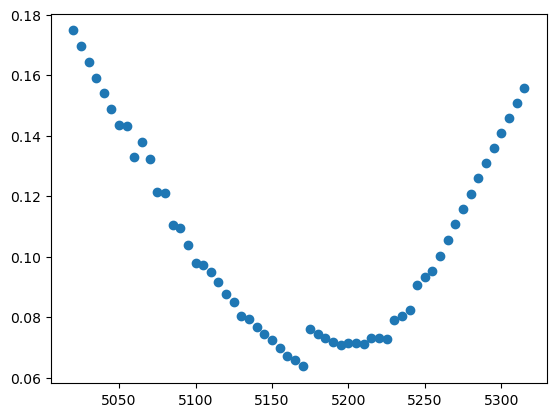

In [13]:
plt.scatter(spx_today['strike'], spx_today['est_iv'])

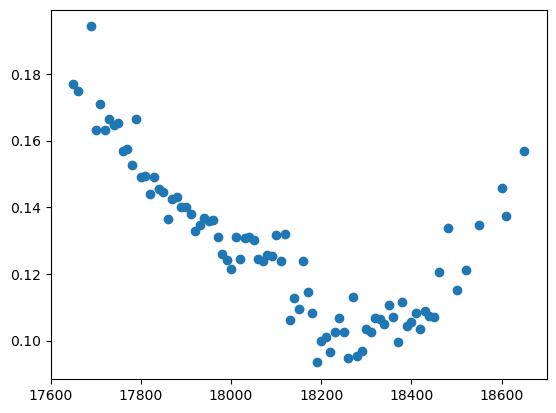

In [14]:
plt.scatter(ndx_today['strike'], ndx_today['est_iv'])

In [21]:
spx_today_iv = gaussian_filter1d(list(spx_today['est_iv']), 3)
ndx_today_iv = gaussian_filter1d(list(ndx_today['est_iv']), 3)

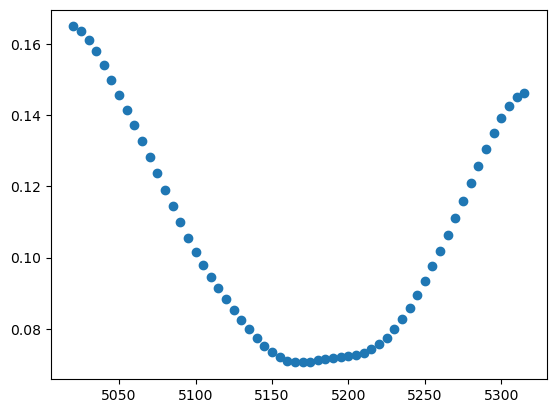

In [19]:
plt.scatter(spx_today['strike'], spx_today_iv)

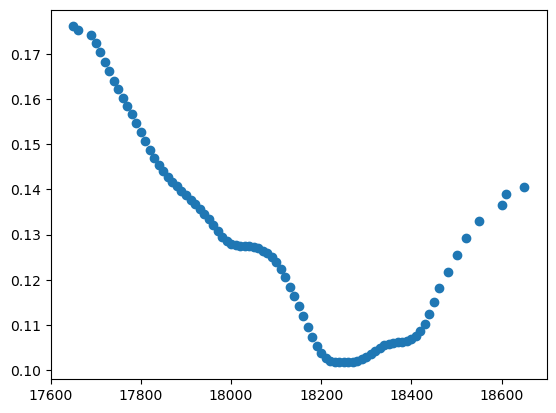

In [22]:
plt.scatter(ndx_today['strike'], ndx_today_iv)

In [27]:
spx_cs = CubicSpline(list(spx_today['strike']), spx_today_iv)
ndx_cs = CubicSpline(list(ndx_today['strike']), ndx_today_iv)
spx_strikes = np.arange(min(spx_today['strike']), max(spx_today['strike']) + 1, 1)
ndx_strikes = np.arange(min(ndx_today['strike']), max(ndx_today['strike']) + 1, 1)

spx_interp_ivs = spx_cs(spx_strikes)
ndx_interp_ivs = ndx_cs(ndx_strikes)

spx_interp_cps = []
ndx_interp_cps = []

for i in range(spx_strikes.shape[0]):
    sp = spx_strikes[i]
    iv = spx_interp_ivs[i]
    cp = black_scholes_call(float(spx_today['Open'].iloc[0]), sp, 1/252, r, iv)
    spx_interp_cps.append(cp)
    
for i in range(ndx_strikes.shape[0]):
    sp = ndx_strikes[i]
    iv = ndx_interp_ivs[i]
    cp = black_scholes_call(float(ndx_today['Open'].iloc[0]), sp, 1/252, r, iv)
    ndx_interp_cps.append(cp)

spx_sp_cp = pd.DataFrame(data={'strike': spx_strikes, 'price': spx_interp_cps})
ndx_sp_cp = pd.DataFrame(data={'strike': ndx_strikes, 'price': ndx_interp_cps})

In [29]:
spx_sp_cp.iloc[:15]

,strike,price
0,5020,154.558923
1,5021,153.560674
2,5022,152.562404
3,5023,151.564107
4,5024,150.565778
5,5025,149.567410
6,5026,148.569002
7,5027,147.570548
8,5028,146.572045
9,5029,145.573493


In [ ]:
df.iloc[1280:]

In [ ]:
implied_volatility_call(54.32, 18151.80, 18160, 1/252, 0.052307779623344944)

In [ ]:
black_scholes_call(18151.80, 18160, 1/252, 0.052307779623344944,0.12385885926959181)

In [ ]:
a = df[(df['ts'] == datetime(2024, 3, 8, 9)) & (df['underlying']=='SPX') & (df['type']=='call')]
plt.scatter(a['strike'], a['open'])

In [ ]:
ndx_hourly = yf.Ticker('^NDX').history(interval='1h').reset_index()[['Datetime','Open', 'Close']]
ndx_hourly['Datetime'] = ndx_hourly.apply(lambda x: datetime(x['Datetime'].year, x['Datetime'].month, x['Datetime'].day, x['Datetime'].hour), axis=1)
spx_hourly = yf.Ticker('^SPX').history(interval='1h').reset_index()[['Datetime', 'Open', 'Close']] #get as much hourly data as yfinance allows for
spx_hourly['Datetime'] = spx_hourly.apply(lambda x: datetime(x['Datetime'].year, x['Datetime'].month, x['Datetime'].day, x['Datetime'].hour), axis=1)

In [ ]:
'''
using Polygon options data, plots beginning of day implied pdf derived from 0dte option on SPX
'''
for idx, row in spx_df.iterrows():
    cur_dt = row['Date']
    open_ = row['Open'] - row['Open'] % 5
    close = row['Close']
    temp_calls = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='SPX') & (df['type']=='call') & (df['strike']>open_)]
    temp_puts = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='SPX') & (df['type']=='put') & (df['strike'] < open_)]
    temp_df = pd.concat([temp_calls, temp_puts], ignore_index=True).sort_values(by=['strike']).reset_index(drop=True)
    spx_dist_dict = {}
    p = 0
    for idx, row in temp_df.iterrows():
        if idx == 0 or idx == temp_df.shape[0]-1:
            continue
        prev_strike = float(temp_df.iloc[idx-1]['strike'])
        cur_strike = row['strike']
        next_strike = float(temp_df.iloc[idx+1]['strike'])

        if next_strike - cur_strike == cur_strike - prev_strike:
            cost = float(temp_df.iloc[idx-1]['open']) + float(temp_df.iloc[idx+1]['open']) - 2 * row['open']
            prof = cur_strike - prev_strike
            p = cost/prof
        else:
            p/=2
        spx_dist_dict[cur_strike] = max(0,p)

    spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
    i = 0
    for k, v in spx_dist_dict.items():
        spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
        i+=1
    plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
    plt.title('{} SPX Open Implied PDF'.format((cur_dt.isoformat())))
    plt.show()
    print(sum(spx_probs_smoothed))
    #break

In [ ]:
'''
using Polygon options data, plots beginning of day implied pdf derived from 0dte option on NDX
'''

for idx, row in ndx_df.iterrows():
    cur_dt = row['Date']
    open_ = row['Open'] - row['Open'] % 5
    close = row['Close']
    temp_calls = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='NDX') & (df['type']=='call') & (df['strike']>open_)]
    temp_puts = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='NDX') & (df['type']=='put') & (df['strike'] < open_)]
    temp_df = pd.concat([temp_calls, temp_puts], ignore_index=True).sort_values(by=['strike']).reset_index(drop=True)
    ndx_dist_dict = {}
    p = 0
    for idx, row in temp_df.iterrows():
        if idx == 0 or idx == temp_df.shape[0]-1:
            continue
        prev_strike = float(temp_df.iloc[idx-1]['strike'])
        cur_strike = row['strike']
        next_strike = float(temp_df.iloc[idx+1]['strike'])

        if next_strike - cur_strike == cur_strike - prev_strike:
            cost = float(temp_df.iloc[idx-1]['open']) + float(temp_df.iloc[idx+1]['open']) - 2 * row['open']
            prof = cur_strike - prev_strike
            p = cost/prof
        else:
            p/=2
        ndx_dist_dict[cur_strike] = max(0,p)

    ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
    i = 0
    for k, v in ndx_dist_dict.items():
        ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
        i+=1
    plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
    plt.title('{} NDX Open Implied PDF'.format((cur_dt.isoformat())))
    plt.show()
    print(sum(ndx_probs_smoothed))
    #break

In [ ]:
r = np.log(1.05374)

In [ ]:
for idx, row in spx_df.iterrows():
    cur_dt = row['Date']
    open_ = row['Open'] - row['Open'] % 5
    close = row['Close']
    temp_calls = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='SPX') & (df['type']=='call') & (df['strike'] > open_)]
    temp_puts = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='SPX') & (df['type']=='put') & (df['strike'] < open_)]
    temp_df = pd.concat([temp_calls, temp_puts])
    temp_df = temp_df.sort_values(by=['strike']).reset_index(drop=True)
    temp_df['iv'] = temp_df.apply(lambda x: find_vol_call(x['open'],open_,x['strike'],1/252, r) if x['type'] == 'call' else find_vol_put(x['open'],open_,x['strike'],1/252, r), axis=1)
    spx_dist_dict = {}
    plt.scatter(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))
    plt.title('{} SPX Open Implied Vol'.format((cur_dt.isoformat())))
    plt.show()


In [ ]:
spx_df.iloc[-1]

In [ ]:
temp_df

In [ ]:
cs = CubicSpline(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))
temp_df['call_price'] = temp_df.apply(lambda x: bs_call(5164.459961, x['strike'], 1/252, r, x['iv']), axis=1)

In [ ]:
bs_call(5164.459961, 5205, 1/252, r,0.095062)

In [ ]:
plt.scatter(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))

In [ ]:
cs = CubicSpline(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))
x = np.arange(5000, 5301, 1)
iv_interp = cs(x)
y = []
for i in range(x.shape[0]):
    y.append(bs_call(5164.459961, x[i], 1/252, r, iv_interp[i]))

plt.plot(x, y)

In [ ]:
x[0], y[0]

In [ ]:
x[10], y[10]

In [ ]:
temp_df